# Ćwiczenia z ANALIZY NUMERYCZNEJ (L)<br/>Lista nr 1 - rozwiązania

---
## Zadanie L1.1.

Jeśli $4ac$ jest małe w porównaniu z $b^2$, to ten wzór dla jednego z pierwiastków powoduje utratę dokładności, gdyż wtedy $$\sqrt{b^2-4ac} \approx |b|$$

In [67]:
using PyPlot

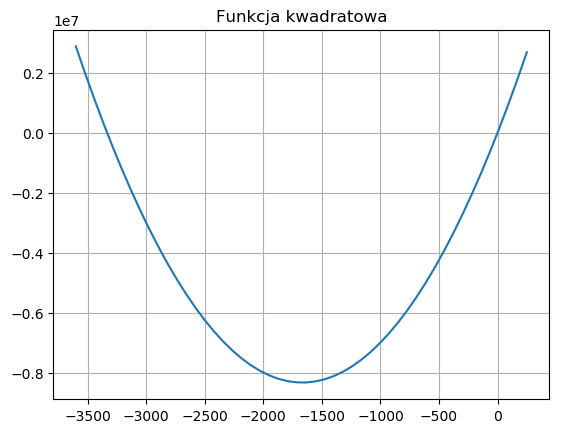

PyObject <matplotlib.text.Text object at 0x7f979baacf98>

In [68]:
# a, b, c, xs = 3.0, 5.0, 1.0, 1:10 # delta > 0
a, b, c, xs = 3.0, 10000.0, 1000.0, linspace(-3600.0, 250.0) # delta > 0
# a, b, c, xs = 4.0, 16.0, 16.0, 1:10 # delta == 0, ale poprawne wyniki
# a, b, c, xs = 5.0, 16.0, 16.0, 1:10 # delta < 0 ? przechodzi na zespolone

f(x) = a*x^2 + b*x + c
ys = map(f, xs)
plot(xs, ys); grid("on"); title("Funkcja kwadratowa")

In [69]:
delta = b^2 - 4*a*c
x0 = (-b + sqrt(delta))/(2*a)
x1 = (-b - sqrt(delta))/(2*a)
println((delta, x0, x1))

(9.9988e7, -0.10000300017994353, -3333.233330333153)


In [70]:
println("--- Wzory Viete'a!")
println((x0 + x1, -b/a, x0 + x1 == -b/a))
println((x0 * x1, c/a, x0 * x1 == c/a))
println("--- Wartości funkcji w miejscach zerowych")
println((f(x0), f(x0) == 0.0))
println((f(x1), f(x1) == 0.0))

--- Wzory Viete'a!
(-3333.333333333333, -3333.3333333333335, false)
(333.33333333310003, 333.3333333333333, false)
--- Wartości funkcji w miejscach zerowych
(6.997424861765467e-10, false)
(0.0, true)


---
## Zadanie L1.2.

In [71]:
function x(n::Int64)
    n += 1 # Julia numeruje tablice od 1, nie od 0
    T = Array{Float64}(2)
    T[1] = 1.
    T[2] = 1. / 5.
    for k = 3:n
        push!(T, ((26. / 5.) * T[k - 1] - T[k - 2]))
    end
    return T[n]
end

collect(map(x, 0:25))

26-element Array{Float64,1}:
 1.0        
 0.2        
 0.04       
 0.008      
 0.0016     
 0.00032    
 6.4e-5     
 1.28e-5    
 2.56e-6    
 5.12003e-7 
 1.02414e-7 
 2.05481e-8 
 4.43651e-9 
 2.52174e-9 
 8.67654e-9 
 4.25963e-8 
 2.12824e-7 
 1.06409e-6 
 5.32044e-6 
 2.66022e-5 
 0.000133011
 0.000665055
 0.00332527 
 0.0166264  
 0.0831319  
 0.415659   

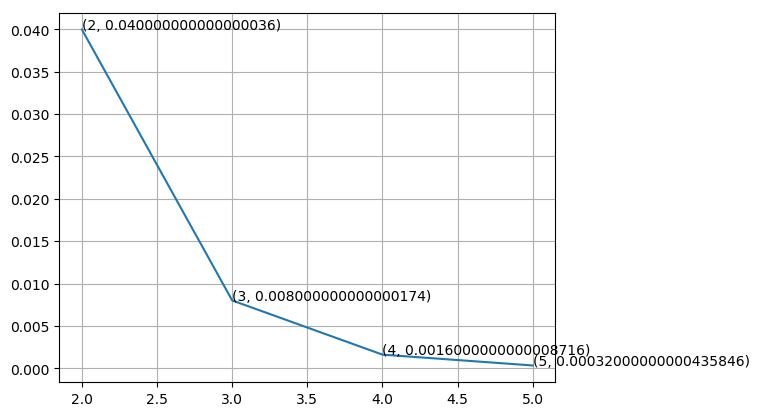

In [72]:
xs = 2:5; ys = map(x, xs)

plot(xs, ys); grid("on")
for xy in zip(xs, ys); annotate("$xy", xy=xy, textcoords="data"); end

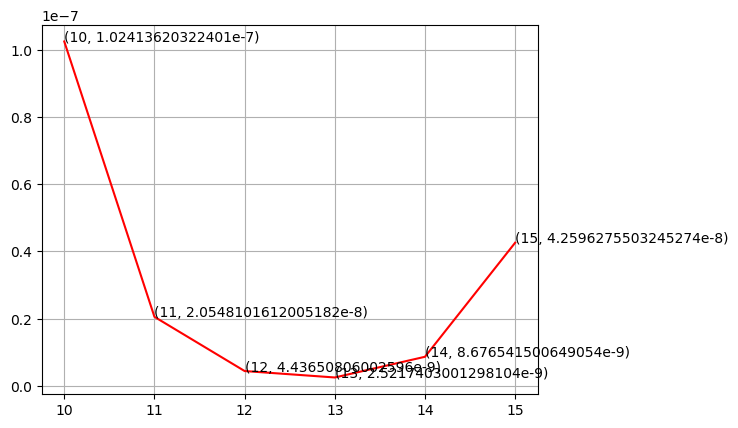

In [73]:
xs = 10:15; ys = map(x, xs)

plot(xs, ys, "r"); grid("on")
for xy in zip(xs, ys); annotate("$xy", xy=xy, textcoords="data"); end

Jednakże:
$$x_1 = \frac{1}{5}   \\
  x_2 = \frac{1}{25}  \\
  x_3= \frac{1}{125} \\
  x_4 = \frac{1}{625} \\
  \vdots \\
  x_k = \frac{1}{5^{k}}
$$
Zgadliśmy wzór ogólny dla $x_k$. Dowodzimy indukcyjnie:
$$ x_k = \frac{1}{5^{k}} \hspace{1.5cm}  a_0=1 \hspace{1.5cm}  a_1= \frac{1}{5} \hspace{1.5cm} a_n= \frac{26}{5}x_{n-1} - x_{n-2}$$

#### 1) Podstawa indukcji
$$ i=0 \hspace{1.5cm} i=1$$
$$x_0=\frac{1}{5^0}=1 \hspace{1.5cm} a_0=1$$
$$ x_1=\frac{1}{5^1}=\frac{1}{5}\hspace{1.5cm} a_1=\frac{1}{5}$$

#### 2) Krok indukcyjny
Założmy że zależność zachodzi dla $n \in {0,1,2,...,i}$. Pokażmy że działa dla $i + 1$:
$$ a_{i+1}= \frac{26}{5}a_i - a_{i-1} \hspace{3cm} a_i=\frac{1}{5^i} \hspace{1.5cm}  a_{i-1}=\frac{1}{5^{i-1}}$$
$$ a_{i+1}=\frac{26}{5}\frac{1}{5^i} - \frac{1}{5^{i-1}}= \frac{26}{5} \cdot \frac{1}{5 \cdot 5^{i-1}} - \frac{1}{5^{i-1}}=\\
= \frac{26-25}{25 \cdot 5^{i-1}} = \frac{1}{5^{i+1}} = x_{i+1}$$
Co należało udowodnić **∎**

---
## Zadanie L1.3.

$$\pi = 4 \sum_{k=0}^{\infty}{\frac{(-1)^k}{2k+1}}$$
Korzystając z takiego szeregu potrzebujemy wykonać bardzo dużo iteracji, aby osiągnąć relatywnie małą dokładność.
Leibnitz
Jeśli ciąg a_n jest malejący i zbieżny do 0, to szereg $$\sum_{n=1}^{\infty}{(-1)^n}a_n$$ jest malejący.

Nasz ciąg jest w postaci $$a_n = {\frac{1}{2k+1}}$$

a) Czy jest zbieżny? 
$$ lim_{k\to\infty}{\frac{1}{2k+1}}=0$$   

b) Czy ciąg jest malejący? 
    
 $$\frac{1}{2k+1} >\frac{1}{2k+3}$$
 
 Zatem skoro szereg jest zbieżny to mogę skorzystać z własności 
 $$ \left|S_{k}-S_{k+1}\right| = a_{k+1}< 10^-7 $$
 jest to błąd którego szukamy.
 $$ {4* \frac {(1)^k}{2k+3}}<10^-7 \\
     2k+3>4*10^7\\
     k > \frac{4*10^7 -3}{2} =19999998,5$$

---
## Zadanie L1.4.

$$\ln(x) = \sum_{k=1}^{\infty}(-1)^{k-1}*\frac{(x-1)^k}{k}$$
Teza: Żeby obliczyć ln2 z błędem mniejszym niż $$ \frac{1}{2}*10^{-6}$$ 
n-ty wyraz musi być większe niż dwa miliony.
$$a_{n}= 1^n* \frac { (2-1)^{n}}{n} < 1/2 * 10^{-6}\\
\frac{1}{n}< \frac{1}{2}* 10^{-6}\\
n> 2*10^6 \\$$
Druga częśc zadań polega na udowodnieniu że zastosowanie związku $$\ln(2)=\ln(e\frac{2}{e})$$ 
może przyspieszyć obliczenia
$$ \ln(e\frac{2}{e}) = \ln(e)+\ln(\frac{2}{e})= 1+\ln(\frac{2}{e})= \sum_{k=1}^{\infty}(-1)^{k-1}\frac{(\frac{2}{e})^k}{k}  $$

Teraz obliczyć błąd dla tego samego n, dla którego wcześniej wychodziło nam n większe niż dwa miliony. Nie możemy jednak użyć tego:
$$\frac{(\frac{2}{e} -1)^{n}}{n} = \frac{(\frac{2-e}{e})^{n}}{n} = \frac{(2 - e)^{n}}{(e^{n}) \cdot n}$$
$$\frac{(2-e)^{n}}{(e^{n})\cdot n} < \frac{1}{2}\cdot  10^{-6} $$
$$\frac{e^{n} \cdot n}{(2-e)^{n}} < 2\cdot 10^6$$ 
$$\frac{e^{n} \cdot n}{(2-e)^ {n}} < \frac{e^{n}}{(2-e)^{n}}$$
$$\frac{e^{n}}{(2-e)^{n}}>e^{n} $$
$$e^{n}>2 \cdot 10^6$$
$$\ln(e^n) < \ln(2*10^6)$$ 
$$n < \approx 14.5086577$$
bo $\ln(2/e)$ rozwinięty z pierwszego wzorka nie jest zbieżny.

---
## Zadanie L1.5.

In [74]:
function my_ln(x::Float64)
    suma::Float64 = 0.0
    while x > 2
        x /= e
        suma += 1
    end

    results = []
    for k = 1:100
        wyraz = (x - 1)^k / k
        if isodd(k)
            suma += wyraz
        else
            suma -= wyraz
        end

        push!(results, (k, suma, wyraz,))
        # println("$k wyrazow, przyblizona wartosc: $suma")
        # println("obecny wyraz: $wyraz")
    end
    return results
end

#
#  Sprawdźmy funkcję my_ln na jakiejś dużej wartości
#
JAKAS_WARTOSC = 100000.
for (k, suma, wyraz) in Iterators.take(my_ln(JAKAS_WARTOSC), 50)
    @printf "%3d %.54f % .54f\n" k suma wyraz
end

  1 11.670170079024567044712057395372539758682250976562500000  0.670170079024567044712057395372539758682250976562500000
  2 11.445606111614669231357765966095030307769775390625000000  0.224563967409897230487203501070325728505849838256835938
  3 11.545936812804777460428340418729931116104125976562500000  0.100330701190107410281093791581952245905995368957519531
  4 11.495507837345904533776774769648909568786621093750000000  0.050428975458873377679669403050866094417870044708251953
  5 11.522544629720625763980024203192442655563354492187500000  0.027036792374720904075235949903799337334930896759033203
  6 11.507445255318677013178785273339599370956420898437500000  0.015099374401947932011758268799894722178578376770019531
  7 11.516118811549684863848597160540521144866943359375000000  0.008673556231007116881781549011520837666466832160949707
  8 11.511032648418021651082199241500347852706909179687500000  0.005086163131663307308827359776159937609918415546417236
  9 11.514062510060579569426408852450549

In [75]:
# Porównanie z biblioteczną
@printf "%.54f" log(JAKAS_WARTOSC)

11.512925464970228617289649264421314001083374023437500000

Tutaj jakieś wnioski... Nie wiem co wpisać

---
## Zadanie L1.6.

Z `PWO++` mamy funkcję $ATan(x), gdy \left| x \right| \le 1$.
$$ arctan(-x) = -arctan(x) \\
arctan(x) + arctan(\frac{1}{x}) = \frac{\pi}{2}, gdy x \gt 0 \\
arctan(x) + arctan(\frac{1}{x}) = -\frac{\pi}{2}, gdy x \lt 0 $$
OBRAZEK
$$ tg(A) = x \Rightarrow A = arctg(x) \\
   tg(B) = x \Rightarrow B = arctg(\frac{1}{x}) $$
Również:
$$ A + B = 90^o \Rightarrow \frac{\pi}{2} $$
$$ arctg(x) + arctg(\frac{1}{x}) = \frac{1}{x} \\
   \iff arctg(x) = \frac{\pi}{2} + arctg(\frac{1}{x}) $$

In [76]:
function myATan(x::Float64)
    if -1 <= x && x <= 1
        return ATan(x)
    elseif x > 1
        return 2ATan(1) - ATan(1/x)
    else
        return -(2ATan(1) - ATan(1/x))
    end
end

myATan (generic function with 1 method)

---
## Zadanie L1.7.

$$ I_n = \int_{0}^{1} \frac{x^{n}}{x+7}dx = \int_{0}^{1} \frac{x^{n} + 7x^{n-1} - 7x^{n-1}}{x+7}dx = \int_{0}^{1} \frac{x^{n-1}(x+7) - 7x^{n-1}}{x+7}dx = \int_{0}^{1} x^{n-1} - \frac{7x^{n-1}}{x+7}dx = \int_{0}^{1} x^{n-1}dx - \int_{0}^{1} \frac{7x^{n-1}}{x+7}dx = (n \ge 1) = \bigg[ \frac{1}{n} x^{n}\bigg]_{0}^{1} - 7 \int_{0}^{1} \frac{x^{n-1}}{x+7}dx = \bigg(\frac{1}{n}-0\bigg) - 7I_{n-1} = \frac{1}{n} - 7I_{n-1} $$

więc          $ I_n = \frac{1}{n} - 7I_{n-1} \implies   I_n + 7I_{n-1} = \frac{1}{n} $   dla $      n \ge 1 $

$$ I_0 = \int_{0}^{1} \frac{x^{0}}{x+7}dx =  \int_{0}^{1} \frac{1}{x+7}dx = \bigg|_{\frac{dx}{du} = 1}^{u = x+7} \bigg|= \int_{0}^{1} \frac{1}{u}du = \bigg[ \ln{u} \bigg]_{0}^{1} = \bigg| u = x+7 \bigg| = \bigg[ \ln{(x+7)} \bigg]_{0}^{1} = \ln{8} - \ln{7} = ln{\bigg(\frac{8}{7}\bigg)}$$

stąd

$$I_{n} = \frac{1}{n} - 7 I_{n-1}$$
$$I_{0} = \ln{\bigg(\frac{7}{8}\bigg)}$$ 
$$n \ge 1 $$

In [77]:
# Teraz wystarczy policzyć w pętli 20 wyrażeń z tego wzoru i powiedzieć, że każdy następny wyraz
# będzie mniej wiarygodny, gdyż będzie kumulował rekurencyjnie błąd pierwszego obliczenia
# dodając własny błąd dzielenia zmiennopozycyjnie. W dodatku następuje odejmowanie liczb bardzo małych,
# więc to już w ogóle katastrofa może nastąpić...

function mI(n::Int64)
    T = Array{Float32}(1)
    T[1] = log(Float32(7.) / Float32(8.))
    for k = 2:n
        push!(T, (Float32(1.) / Float32(k) - Float32(7.) * T[k - 1]))
    end
    return T[n]
end

collect(map(mI, 1:20))

20-element Array{Float32,1}:
     -0.133531  
      1.43472   
     -9.70971   
     68.2179    
   -477.326     
   3341.45      
 -23390.0       
 163730.0       
     -1.14611f6 
      8.02277f6 
     -5.61594f7 
      3.93116f8 
     -2.75181f9 
      1.92627f10
     -1.34839f11
      9.43871f11
     -6.60709f12
      4.62497f13
     -3.23748f14
      2.26623f15

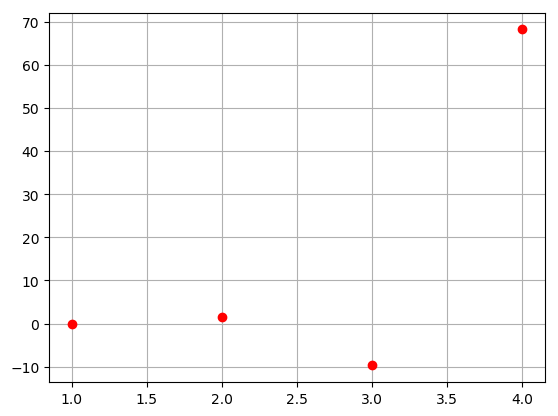

In [78]:
xs = 1:4; ys = map(mI, xs)

plot(xs, ys, "ro"); grid("on")
# axis([.5,8.5,-10.,10.])

---
## Zadanie L1.8.

(h - małe)
Z definicji pochodna funkcji $f$ to $$f'(x) = \frac{f(x+h)-f(x)}{h} \tag{*}$$
Wpierw mamy sprawdzić, czy zachodzi wzór $$f'(x) = \lim_{h \rightarrow 0}\frac{f(x+h)-f(x-h)}{2h} \tag{**}$$.
Podstawiamy więc do `(**)` za $x = x + h$. Otrzymujemy: $$(*) = f'(x+h) = \frac{f((x+h)+h)-f((x+h)-h)}{2h} = \frac{f(x+2h)-f(x)}{2h}$$
teraz niech $t=2h$, to:
$$= \frac{f(x+t)-f(x)}{t} = (*)$$
Przyjrzyjmy się zatem obu wzorom:

In [79]:
f(x) = e^(2. * x)
fp(x) = 2. * e^(2. * x)
x0 = 0.5
DO_POROWNANIA = 60

fp1(x, h) = (f(x + h) - f(x)) / h     # z definicji pochodnej
fp2(x, h) = (f(x + h) - f(x - h)) / (2. * h) # ten drugi

function porownaj(fun, x, delta)
    h = 1.0
    dokladny = fp(x)
    results = []
    for i in 0:100
        wynik = fun(x, h)
        err = abs(wynik - dokladny)
        push!(results, (i, err, wynik, h,))
        h /= delta
    end
    return results
end


println("i    error              wynik              h")
for wynik in Iterators.take(porownaj(fp1, x0, 2.), DO_POROWNANIA)
    println(wynik)
end
println()
println("i    error              wynik              h")
for wynik in Iterators.take(porownaj(fp2, x0, 2.), DO_POROWNANIA)
    println(wynik)
end

i    error              wynik              h
(0, 11.930691437810534, 17.367255094728623, 1.0)
(1, 3.9049848840251213, 9.341548540943212, 0.5)
(2, 1.6170653105979875, 7.053628967516078, 0.25)
(3, 0.7399253751042805, 6.176489032022371, 0.125)
(4, 0.3543966704256851, 5.790960327343775, 0.0625)
(5, 0.17348804588880906, 5.610051702806899, 0.03125)
(6, 0.08583812088553255, 5.522401777803623, 0.015625)
(7, 0.04269523473711612, 5.479258891655206, 0.0078125)
(8, 0.02129198855404635, 5.4578556454721365, 0.00390625)
(9, 0.010632127801179614, 5.44719578471927, 0.001953125)
(10, 0.005312602358706009, 5.441876259276796, 0.0009765625)
(11, 0.00265543642776489, 5.439219093345855, 0.00048828125)
(12, 0.001327502104820688, 5.437891159022911, 0.000244140625)
(13, 0.0006636970375870632, 5.437227353955677, 0.0001220703125)
(14, 0.00033183501559275186, 5.436895491933683, 6.103515625e-5)
(15, 0.00016591413636657393, 5.436729571054457, 3.0517578125e-5)
(16, 8.29562287867347e-5, 5.436646613146877, 1.5258789062